## Churn Prediction

 Churn means customers leaving and going to a different provider. But it can also mean downgrading to a cheaper plan.

# What is the Goal?
Predict behavior to retain customers.

In [1]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [3]:
# read a csv file from google drive
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [4]:
# get to know your data:
print (df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can notice that 'TotalCharges' column data type is object when it should have been int64

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# change data types
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [9]:
df.loc[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


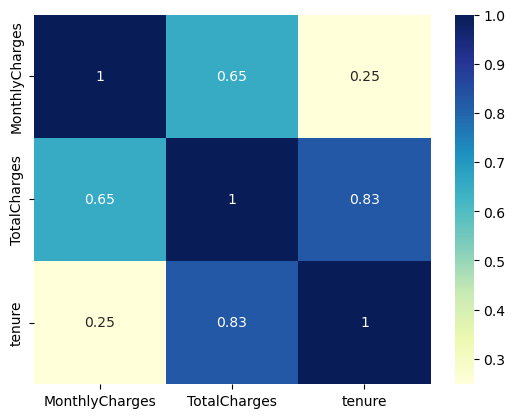

In [10]:
# plotting correlation heatmap
dataplot=sns.heatmap(df[['MonthlyCharges', 'TotalCharges', 'tenure']].corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

In [11]:
# here the number of datapoints having missing values is very less, so we drop them
df.dropna(inplace = True)

**NOTE:** Always keep in mind that whatever imputation, data manipulation you perform before modeling, you need to perform them later on a fresh dataset on which you would have to make predictions.  

In [12]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

26% of the customers in our dataset churned. This is an imbalanced dataset: the target classes are imbalanced.

## Univariate Analysis

<Axes: xlabel='Churn', ylabel='tenure'>

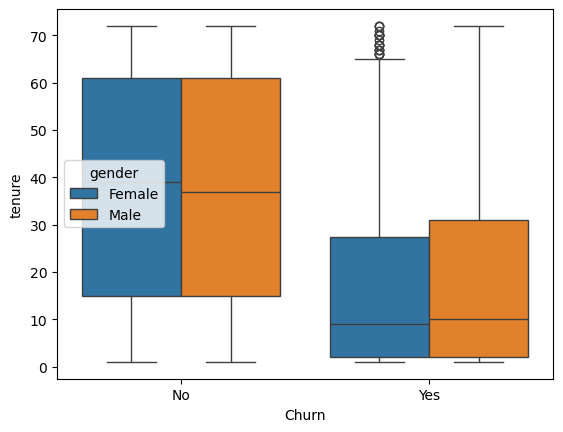

In [14]:
sns.boxplot(x = df['Churn'], y = df['tenure'], hue = df['gender'])

### Monthly/Total Charges vs. Churn

Text(0.5, 1.0, 'Box Plot\nDistribution of MonthlyCharges by Churn')

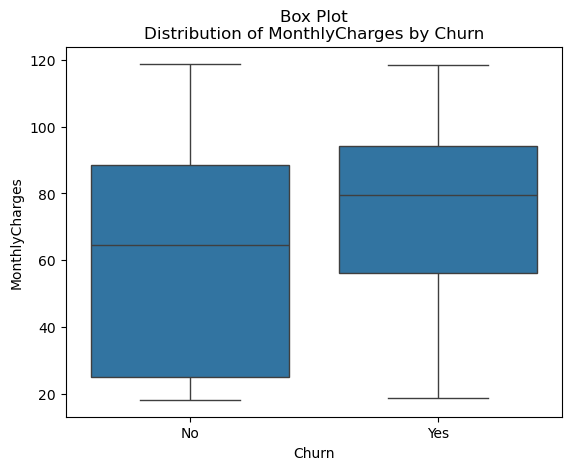

In [15]:
fig, ax = plt.subplots()
sns.boxplot(x = df['Churn'], y = df['MonthlyCharges'], ax=ax)
ax.set_title("Box Plot\nDistribution of MonthlyCharges by Churn")

Text(0.5, 1.0, 'Churn by Monthly Charges')

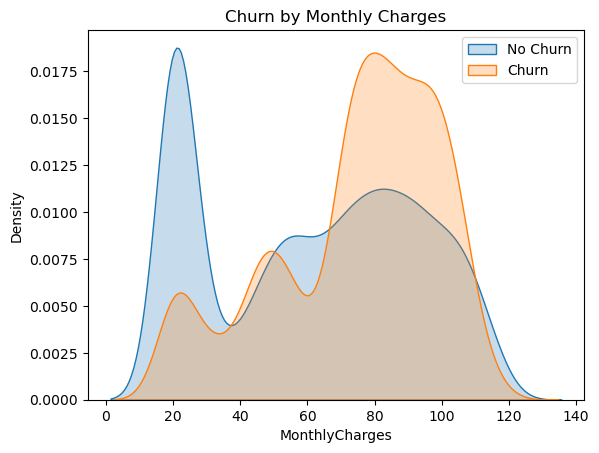

In [17]:
fig, ax = plt.subplots()
sns.kdeplot(data=df.loc[df['Churn']=='No'], x='MonthlyCharges', fill=True, ax=ax)
sns.kdeplot(data=df.loc[df['Churn']=='Yes'], x='MonthlyCharges', fill=True, ax=ax)
ax.legend(['No Churn', 'Churn'])
ax.set_title("Churn by Monthly Charges")

**NOTE** on KDE plot: A Kernel Density Estimation (KDE) plot visually represents the distribution of data, providing insights into its shape, central tendency, and spread. The KDE plot is a smoothed version of a histogram. It estimates the underlying probability density function (PDF) of the data.
Unlike histograms, which use discrete bins, KDE provides a continuous representation of the data distribution. The y-axis represents density, not raw counts. The area under the curve must sum to 1, as it represents the total probability.

**Insight:** Most customers with high monthly charges have churned.

Text(0.5, 1.0, 'Box Plot\nDistribution of MonthlyCharges by Churn')

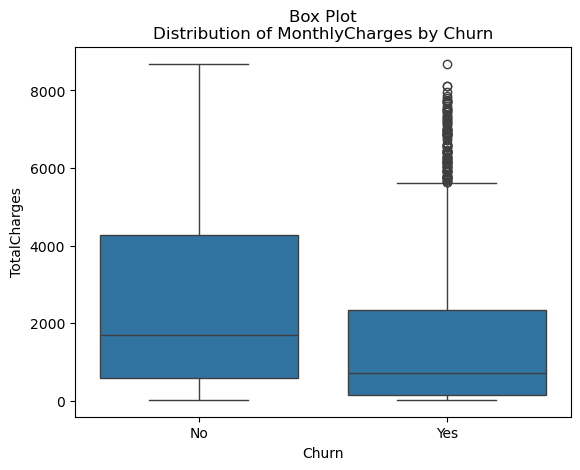

In [18]:
fig, ax = plt.subplots()
sns.boxplot(x = df['Churn'], y = df['TotalCharges'])
ax.set_title("Box Plot\nDistribution of MonthlyCharges by Churn")

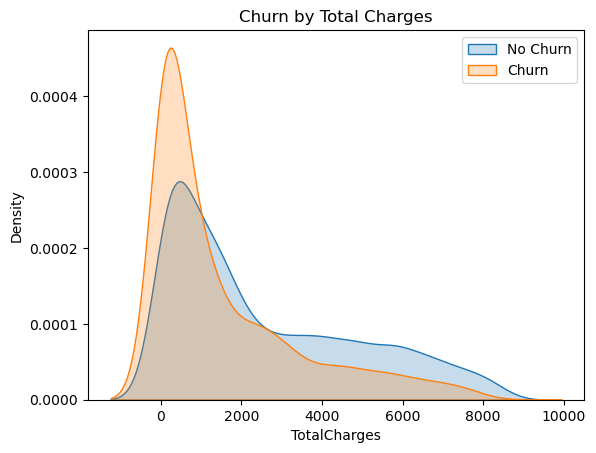

In [21]:
fig, ax = plt.subplots()
sns.kdeplot(data=df.loc[df['Churn']=='No'], x='TotalCharges', fill=True, ax=ax)
sns.kdeplot(data=df.loc[df['Churn']=='Yes'], x='TotalCharges', fill=True, ax=ax)
ax.legend(['No Churn', 'Churn'])
ax.set_title("Churn by Total Charges");

**Insight:** Churn is more prevalent amongst customers with lower total churn??

In [22]:
df['fraction_monthly_charge'] = df.apply(lambda s: s['MonthlyCharges']/s['TotalCharges'], axis=1)

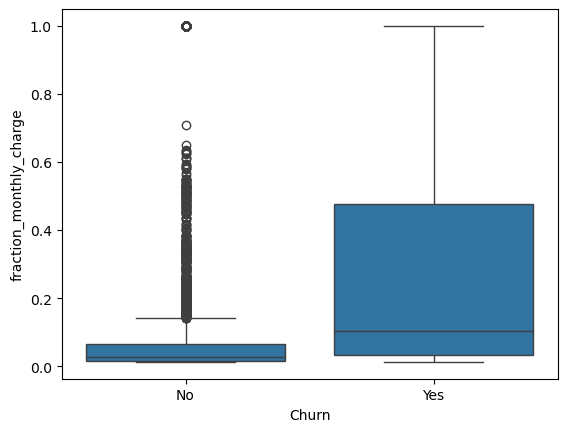

In [23]:
sns.boxplot(x = df['Churn'], y = df['fraction_monthly_charge']);

In [24]:
np.corrcoef(df.apply(lambda s: s['TotalCharges']/s['tenure'], axis=1), df['MonthlyCharges'])

array([[1.        , 0.99623731],
       [0.99623731, 1.        ]])

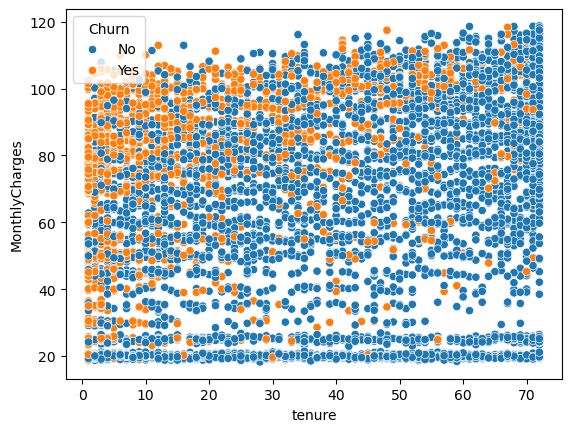

In [25]:
 # a scatter plot: tenure vs. monthly charges
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, legend='brief')
plt.show()

**Insight:** High Monthly Charges and low tenure (early on) have a density of orange points.

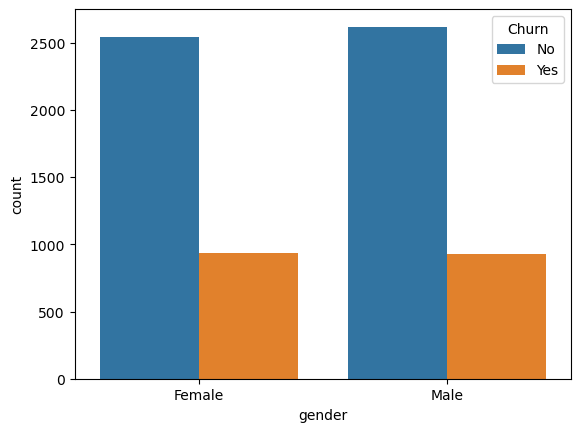

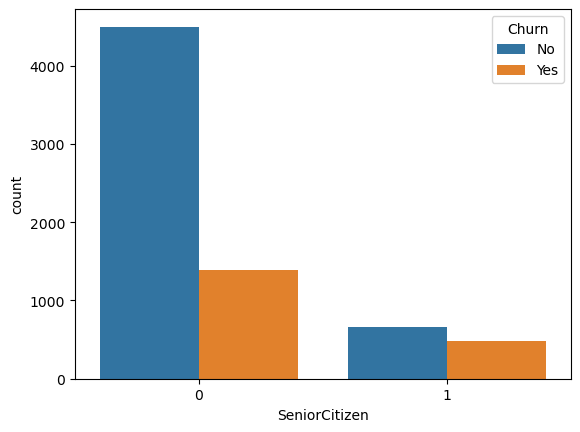

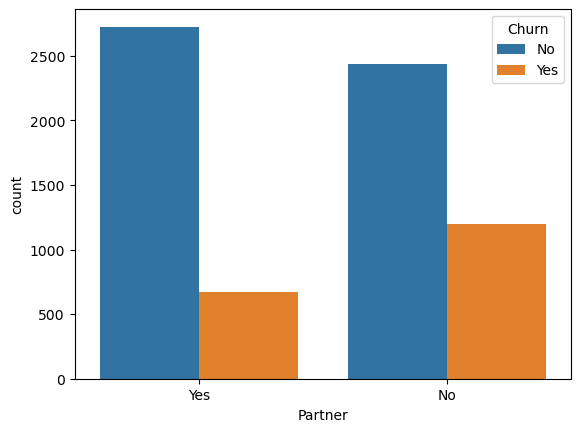

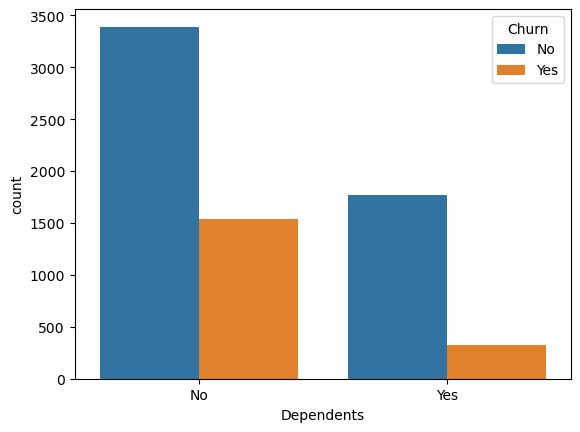

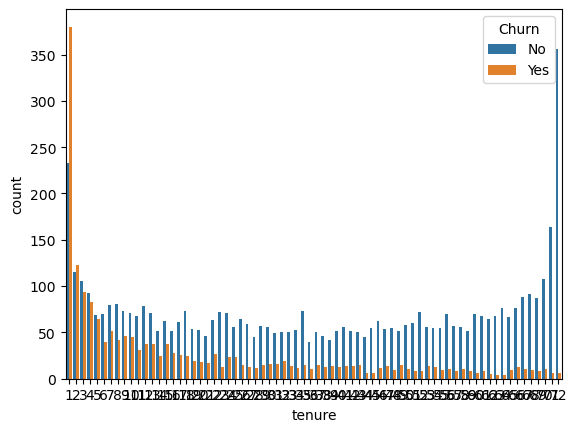

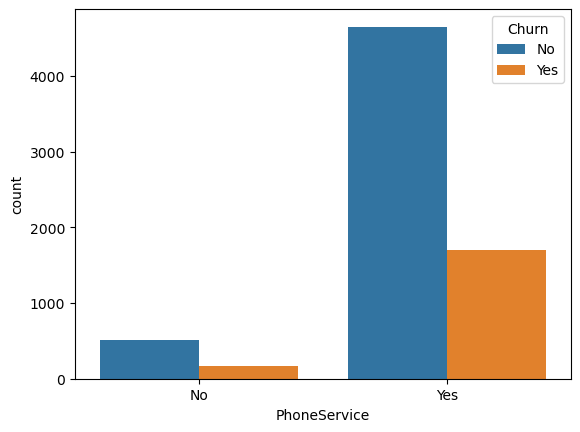

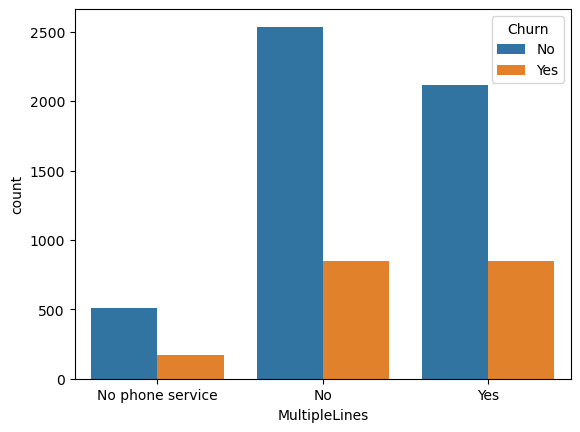

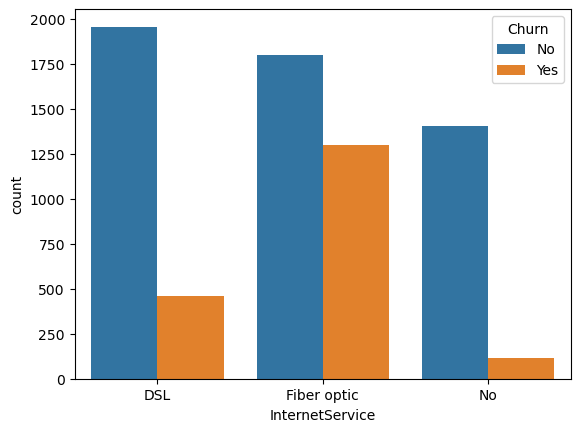

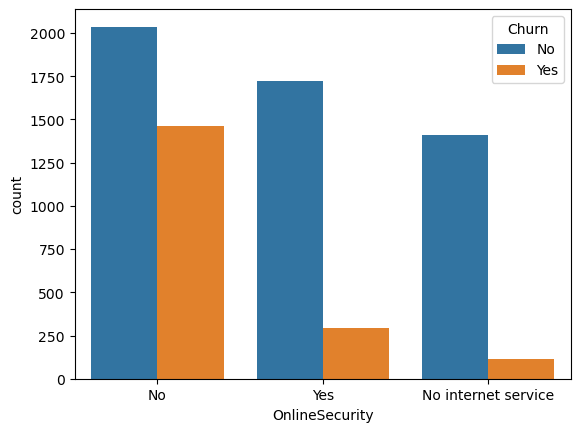

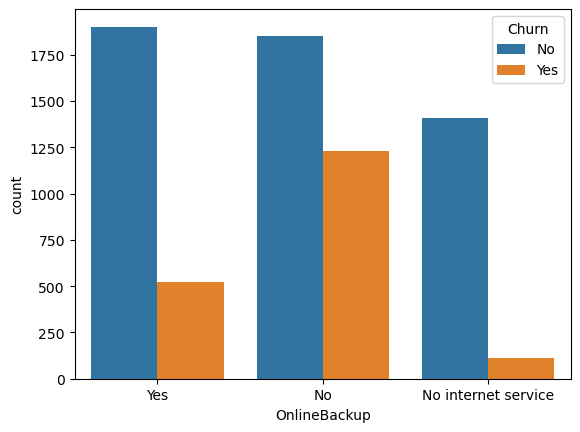

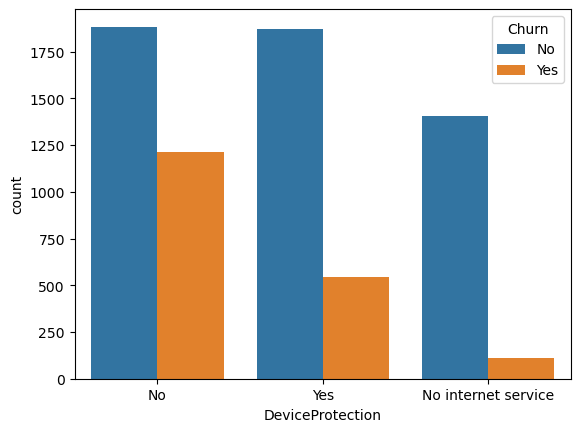

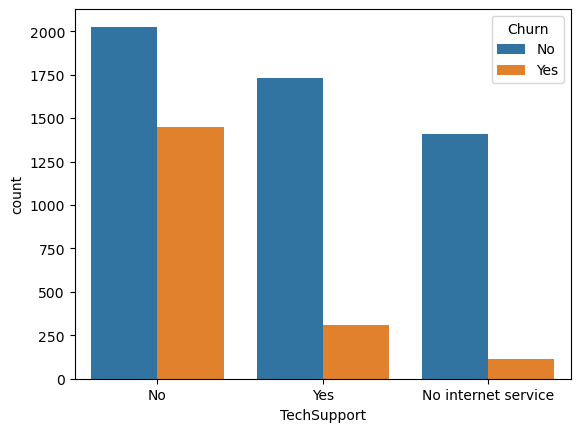

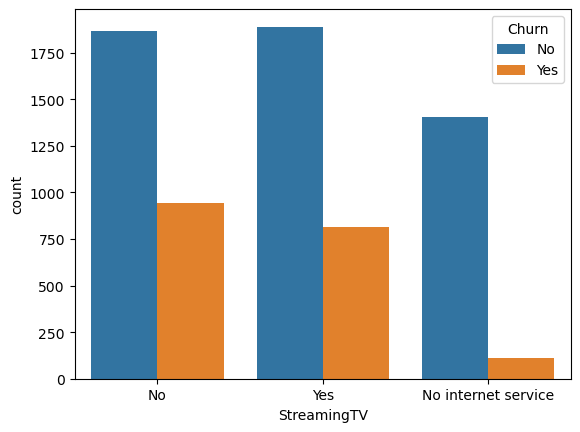

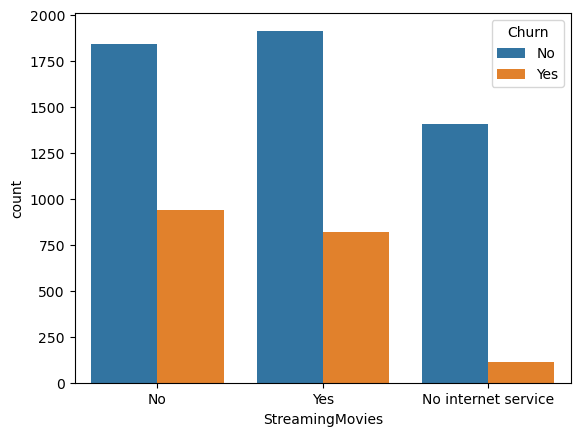

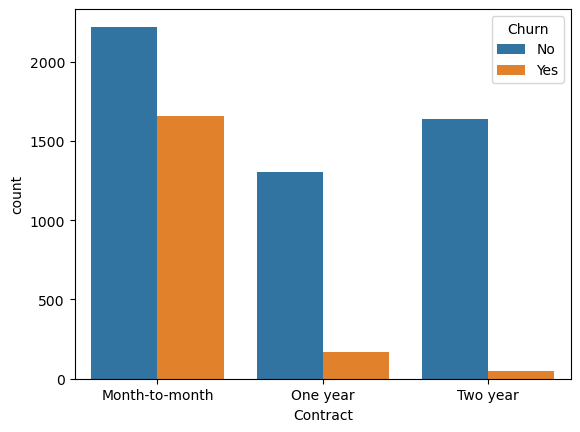

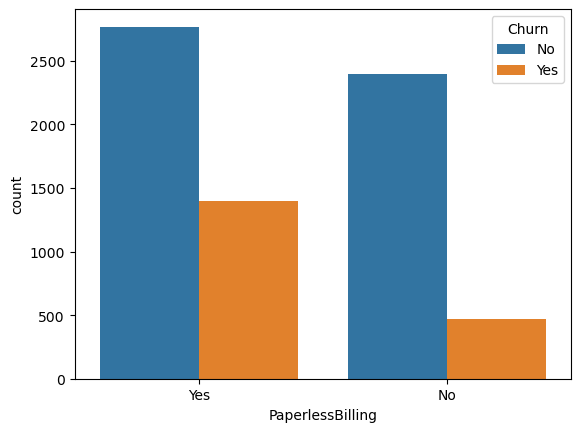

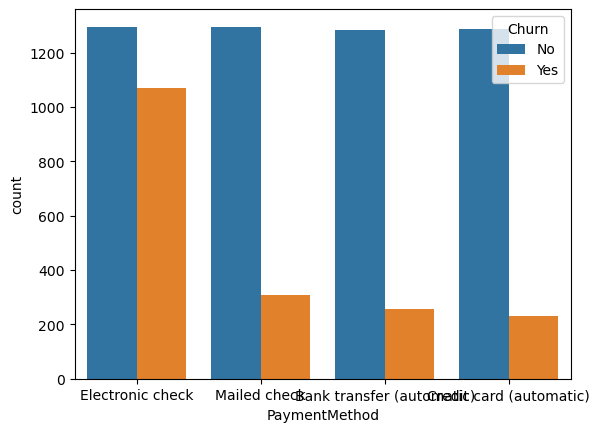

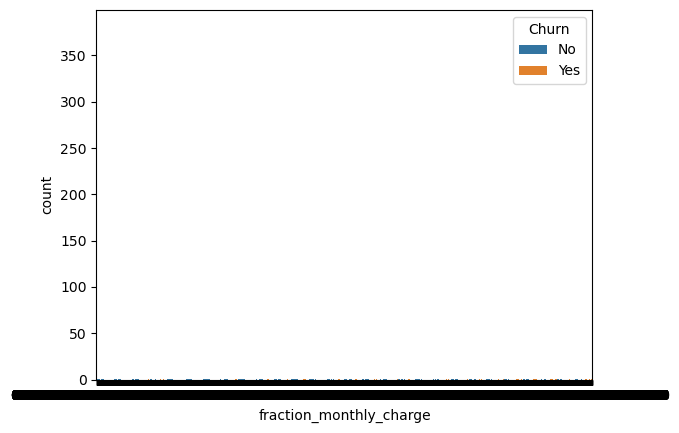

In [26]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'customerID'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [27]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index')

Churn,No,Yes
SeniorCitizen,,
0,0.763497,0.236503
1,0.583187,0.416813


# Model Building

In [28]:
# predict churn with a probability of 0.26:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

### Format the data appropriately


In [29]:
# we've already changed the dtype of Total Charges
# convert churn to binary numeric variable
df['Churn_onehotenc'] = np.where(df.Churn == 'Yes',1,0)

In [30]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, max(df['tenure']), 12)]

df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [31]:
# Converting all categorical variables into dummy variables
variables_for_model = ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'tenure_group', 'Churn', 'fraction_monthly_charge', 'Churn_onehotenc','MonthlyCharges', 'TotalCharges']

In [32]:
df_with_dummies = pd.get_dummies(df[variables_for_model], dtype=np.uint8, drop_first=True)

### Feature Engineering

1. Handsoff People - People who have 1-2 year contracts and have paperless billing enabled, and are making automatic payments. These are people who value convenience a lot and would rather spend their time in other ways as opposed to hunting for better deals from other providers.
2. Streamers - People who like streaming movies/videos and have been with the company for a long enough time would probably not churn. The fact that they have been with the compaby long enough means they are happy with the streaming service and would probably not churn.

In [33]:
handsoff_customers = df.loc[(df['Contract']!='Month-to-month') & (df['PaperlessBilling']=='Yes') & (df['PaymentMethod'].str.contains("automatic"))]

In [35]:
df['handsoff_customers'] = df.apply(lambda s: 1 if ((s['Contract']!='Month-to-month')
                                                  & (s['PaperlessBilling']=='Yes')
                                                  & ("automatic" in s['PaymentMethod'] ))
                                                  else 0, axis=1)

df_with_dummies['handsoff_customers'] = df.apply(lambda s: 1 if ((s['Contract']!='Month-to-month')
                                                  & (s['PaperlessBilling']=='Yes')
                                                  & ("automatic" in s['PaymentMethod'] ))
                                                  else 0, axis=1)

In [36]:
# let's see if there's a relation between handsoff customers and churn:
pd.crosstab(df['handsoff_customers'], df['Churn'], normalize="index")

Churn,No,Yes
handsoff_customers,,
0,0.702290,0.297710
1,0.925447,0.074553


**Insight:** Only 7% of the 'Hands Off' customers churn whereas ~30% of non-Hands-Off customers churn.

In [37]:
# verify with chi square test
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['handsoff_customers'], df['Churn']))
if p<0.05:
  print (f"Since p-value ({p}) is less than 0.05, we reject the null hypothesis that Churn is independent of whether or not a customer is Hands-Off")

Since p-value (1.607619616390953e-49) is less than 0.05, we reject the null hypothesis that Churn is independent of whether or not a customer is Hands-Off


In [38]:
handsoff_customers['Churn'].value_counts(normalize=True)

Churn
No     0.925447
Yes    0.074553
Name: proportion, dtype: float64

### Baseline 1: Randomly predicting churn or no churn

In [39]:
# define the true y
y_true = df['Churn_onehotenc'].tolist()

In [40]:
# model 1
np.random.choice([1, 0], 1, p=[0.26537, 1-0.26537])[0]

# compute predictions
y_pred_baseline = [np.random.choice([1, 0], 1, p=[0.26537, 1-0.26537])[0] for i in range(len(df))]

In [41]:
# baseline performance
precision_recall_fscore_support(y_true, y_pred_baseline)


(array([0.73876514, 0.27795193]),
 array([0.73232617, 0.28464419]),
 array([0.73553156, 0.28125826]),
 array([5163, 1869]))

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred_baseline)

array([[3781, 1382],
       [1337,  532]])

## Decision Tree

In [43]:
# subset of predictors only
decision_tree_data = df_with_dummies.drop(['Churn_onehotenc', 'Churn_Yes'], axis=1)

In [44]:
# split into train and test:
x_train,x_test,y_train,y_test = train_test_split(decision_tree_data,y_true,test_size=0.2)

In [45]:
# Define the model parameters and fit the model
dec_tree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8)

In [46]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [47]:
y_pred=dec_tree.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1018
           1       0.61      0.53      0.57       389

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



In [51]:
# weighted decision tree
# weighting the classes - n_samples/(2*n_samples_class_A)
dec_tree_weighted = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=6, min_samples_leaf=8, class_weight='balanced')

In [52]:
dec_tree_weighted.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=8,
                       random_state=100)

In [53]:
y_pred=dec_tree_weighted.predict(x_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1018
           1       0.51      0.78      0.62       389

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



In [54]:
# ROC Curves
y_pred_proba = dec_tree_weighted.predict_proba(x_test)[:,1]

[Text(0.5, 0, 'False Positive Rate'),
 Text(0, 0.5, 'True Positive Rate'),
 Text(0.5, 1.0, 'ROC Curve: Churn vs No Churn')]

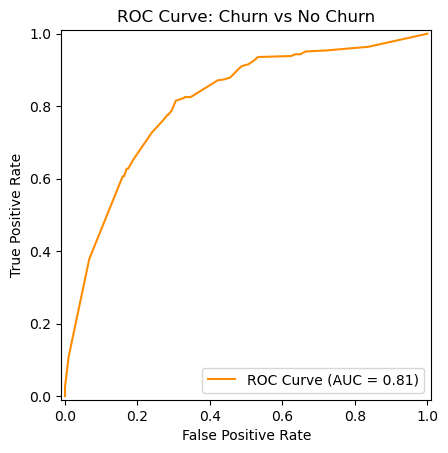

In [55]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred_proba,
    name="ROC Curve",
    color="darkorange",
    #plot_chance_level=True
)
display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve: Churn vs No Churn",
)

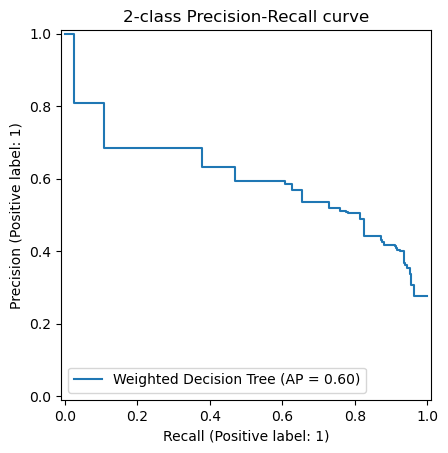

In [56]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    dec_tree_weighted, x_test, y_test, name="Weighted Decision Tree"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [57]:
# let's choose a different threshold:
y_pred_proba = dec_tree_weighted.predict_proba(x_test)[:,1]
y_pred_035 = (y_pred_proba>=0.65).astype(int)

In [58]:
print(classification_report(y_test, y_pred_035, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1018
           1       0.58      0.63      0.60       389

    accuracy                           0.77      1407
   macro avg       0.72      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



- High threshold -> High precision, Low recall
- Looking at ROC/Precision-recall curves gives us a good idea
- What is more expensive for the business: false positive or false negative?
- Healthcare - false negatives are more expensive


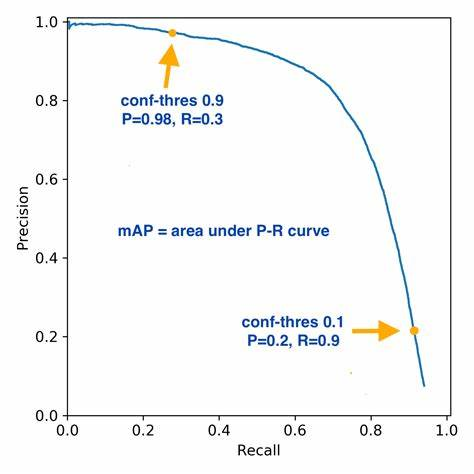

Image Source: [Link](https://th.bing.com/th/id/OIP.25Ia3AexT3TCdBkyMAnbpAAAAA?rs=1&pid=ImgDetMain)

In [59]:
# let's check out a random forest model
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [60]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [61]:
# predicting with threshold=0.5
y_pred=random_forest.predict(x_test)

In [62]:
# usiong a different threshold
y_pred_proba = random_forest.predict_proba(x_test)[:,1]
y_pred_threshold = (y_pred_proba>=0.45).astype(int)

In [63]:
print(classification_report(y_test, y_pred_threshold, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1018
           1       0.64      0.53      0.58       389

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



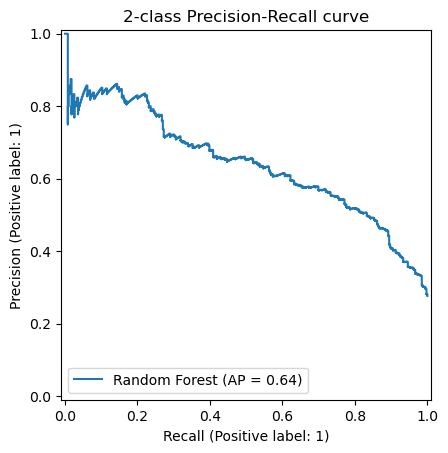

In [64]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    random_forest, x_test, y_test, name="Random Forest"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

## Conlcusion
1. Let's say the company is planning to send out targetted offers/discounts to all potential churners. So we would want to have a high precision as giving heavy discounts to non-churners will result in losses for the company.
2. After looking at the above performances, will probably go with random forest as the area under PR curve is 0.66 and we are able to achieve a decent precision and recall.
3. In case of Decision Tree, recall rapidly decreased with increasing precision.